In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ml_library import PolynomialRegression, train_test_split, z_score_normalization

In [2]:
df = pd.read_csv('./dataset/poly_train.csv')
df.shape

(1200, 8)

In [3]:
df.sample(5)

,x0,x1,x2,x3,x4,x5,x6,y
103,48461.284757,41721.757271,-215.325936,-200.993119,709710.474934,-1.012029,-1.143716,2.298342e+41
98,5970.854634,5711.848847,-245.032964,-216.525191,430510.116585,-0.969052,-1.159103,3.882770e+33
490,35123.948881,29666.199413,-155.127680,-131.765208,944866.642124,-0.457901,0.425103,1.067846e+40
928,29244.654774,24963.455609,-245.032696,-216.310115,902558.583894,NaN,-0.920154,2.258882e+39
676,45771.714113,38436.100386,30.753915,11.762291,695002.260846,-0.540458,-1.330732,1.098513e+41


In [4]:
df[df.isnull().any(axis=1)]

,x0,x1,x2,x3,x4,x5,x6,y
10,NaN,15733.821339,41.721516,33.567872,92456.328181,-0.137447,0.519169,3.545351e+37
20,37923.739985,NaN,-42.371987,-24.123526,610902.017122,-0.114746,0.454621,2.249520e+40
21,17777.936329,14010.135880,52.257782,NaN,972737.562690,0.194406,0.479618,1.247764e+37
30,37258.526823,33216.782588,-112.298295,-104.444372,836809.880826,NaN,0.543932,2.953720e+40
42,35037.233892,29211.779157,-67.951645,-67.177036,765044.149962,NaN,-0.096176,9.293372e+39
...,...,...,...,...,...,...,...,...
1145,16131.560457,13920.962719,-95.020012,NaN,282411.914183,-1.178597,-0.099690,1.178080e+37
1147,40085.360537,34295.949700,-103.122036,-105.032482,221713.950701,0.398882,NaN,3.938554e+40
1158,21860.927652,19493.991129,NaN,-156.568994,229843.445165,1.311670,1.250360,2.439260e+38
1169,4710.383385,3976.943125,NaN,-19.667726,706551.384606,0.035630,-1.433750,1.493123e+32


In [5]:
df.fillna(df.mean(), inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      1200 non-null   float64
 1   x1      1200 non-null   float64
 2   x2      1200 non-null   float64
 3   x3      1200 non-null   float64
 4   x4      1200 non-null   float64
 5   x5      1200 non-null   float64
 6   x6      1200 non-null   float64
 7   y       1200 non-null   float64
dtypes: float64(8)
memory usage: 75.1 KB


In [7]:
X = df.drop('y', axis=1).values
y = df['y'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 7), (240, 7), (960,), (240,))

In [9]:
X_train = z_score_normalization(X_train)
X_test = z_score_normalization(X_test)

In [11]:
alpha = 0.06
iters = 2000
model = PolynomialRegression(degree=3, alpha=alpha, iters=iters)
model.fit(X_train, y_train)
#
#1.0307556996924903e+80 -> 0.06

Epoch 0: Cost 1.158792871681847e+81
Epoch 200: Cost 9.695395985550298e+79
Epoch 400: Cost 8.847595945199119e+79
Epoch 600: Cost 8.405391468238695e+79
Epoch 800: Cost 8.125907830404456e+79
Epoch 1000: Cost 7.931687766990081e+79
Epoch 1200: Cost 7.788728555426119e+79
Epoch 1400: Cost 7.679343372940877e+79
Epoch 1600: Cost 7.593239595095806e+79
Epoch 1800: Cost 7.523944740820403e+79


(array([-5.17541860e+39, -6.13744678e+39, -5.83739544e+39,  3.38101039e+39,
        -3.76488106e+39,  2.19703571e+38,  9.58245292e+38, -2.32667281e+38,
         1.02946772e+40, -7.16479345e+39, -9.51521532e+38, -9.00944463e+38,
         3.07254850e+39,  2.91415665e+38,  6.91481931e+39,  3.43916073e+40,
        -5.34861649e+38,  1.91992327e+39, -3.25353831e+39, -9.83001144e+38,
        -7.10117660e+39,  1.73666657e+39,  1.69787949e+37, -1.31266257e+39,
         1.62175139e+39, -1.25964443e+39, -1.46228761e+39,  1.14472140e+39,
        -1.57439434e+39,  9.93315622e+38,  7.51804773e+36,  4.00953224e+38,
         1.49923753e+37, -9.28277995e+37,  2.90089745e+38, -6.39373761e+37,
         1.42804440e+40, -1.48640306e+40,  2.80870835e+39,  3.76124363e+39,
         9.20513353e+39, -7.94122892e+39,  1.61378423e+40,  3.07482182e+38,
        -8.60413504e+39, -5.93731067e+39, -5.65598778e+39,  6.01597141e+39,
        -1.21630986e+40,  2.73863115e+39,  1.41575126e+39,  3.70919171e+39,
        -6.0

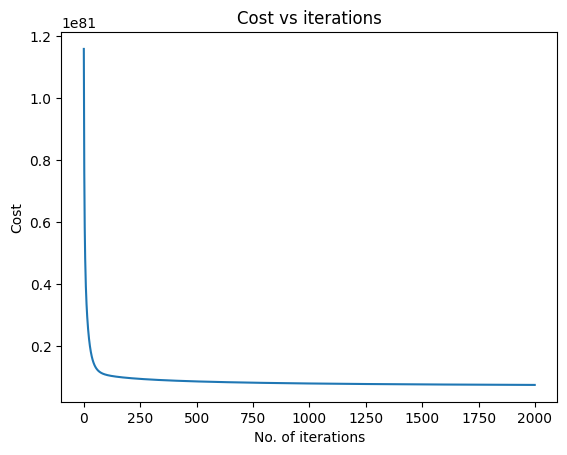

In [12]:
model.plot_cost()

In [13]:
y_pred = model.predict(X_test)
y_pred[:5]

array([-1.28715516e+39,  1.17801843e+41,  2.58079825e+40,  4.07819505e+39,
        1.70601425e+41])

In [14]:
model.evaluation_metrics(y_test, y_pred)

R2 Score: 0.9480210064975768
Mean Squared Error: 1.6506814407971558e+80
Root Mean Squared Error: 1.2847884809559727e+40
Mean Absolute Error: 9.87271687465245e+39


(np.float64(0.9480210064975768),
 np.float64(1.6506814407971558e+80),
 np.float64(1.2847884809559727e+40),
 np.float64(9.87271687465245e+39))

In [ ]:
df_test = pd.read_csv('./dataset/poly_test.csv')
df_test.shape

(400, 7)

In [ ]:
X_testing = df_test.values
X_testing = z_score_normalization(X_testing)

In [ ]:
y_pred_test = model.predict(X_testing)
y_pred_test[:5]

array([ 1.19824109e+40,  1.51719179e+40, -7.21385797e+39,  1.74455535e+40,
       -3.30580435e+40])

In [ ]:
df_test['y'] = y_pred_test

In [ ]:
df_test.to_csv('./output/polynomial_regression_submission.csv', index=False)